<a href="https://colab.research.google.com/github/sujal-dhawan/Loan-Eligibility-Prediction/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Eligibility Prediction (by SUJAL DHAWAN)

In today's world, loans play a vital role in funding education, living expenses, and property purchases. Banks assess various factors like marital status, income, and credit history to determine loan eligibility.

This project predicts loan eligibility using machine learning. The dataset consists of 8 features, including Gender, Applicant Income, and Credit History. The following algorithms are used:

- **Random Forest**: An ensemble learning method used for classification.
- **Logistic Regression**: A linear classification algorithm.
- **Evaluation Metrics**: Cross-validation and ROC-AUC are used for performance assessment.



### Project Workflow:
1. **Import Libraries and Dataset**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preprocessing**
4. **Model Development and Evaluation**





## **Dataset Description**  

The dataset consists of **8 features** used to predict loan eligibility.  

| **Column Name**        | **Description**                             |  
|------------------------|--------------------------------------------|  
| **Loan_ID**           | Unique identifier for each loan.           |  
| **Gender**           | Applicant's gender (Male/Female).           |  
| **Married**          | Marital status (Yes/No).                    |  
| **ApplicantIncome**  | Applicant’s income.                        |  
| **LoanAmount**       | Loan amount in thousands.                   |  
| **Loan_Amount_Term** | Loan term (months).                         |  
| **Credit_History**   | Credit history (1 for good, 0 for bad).     |  
| **Loan_Status**      | Loan approval status (Y/N).                 |  

This dataset will help predict whether an applicant’s loan will be approved or rejected.  



### Preview for the code below

- **File:** `loan_data_improved.csv`
- **Preprocessing Steps:**
  - **Missing Values Handled:**
    - `LoanAmount`: Filled with median value
    - `Gender`: Filled with mode value
  - **Feature Engineering:**
    - Created `Income_to_Loan_Ratio`
    - Created `Total_Income`
  - **Categorical Encoding:** Applied Label Encoding to categorical features.

### Data Preparation

- **Class Imbalance:** Resolved using Random Over-Sampling.
- **Feature Scaling:** Applied StandardScaler to numerical features.

### Model Training & Evaluation

- **Data Split:** Training and validation sets created.
- **Models Trained:**
  - **Random Forest**
  - **Logistic Regression**
- **Hyperparameter Tuning:** GridSearchCV applied to Random Forest.

### Model Performance

#### **Random Forest**
- **Train Accuracy:** 100%
- **Validation Accuracy:** 86.53%
- **Cross-validation ROC AUC Score:** 94.23%
- **Best Hyperparameters:** `max_depth=10`, `n_estimators=200`

#### **Logistic Regression**
- **Train Accuracy:** 90.57%
- **Validation Accuracy:** 90.15%
- **Cross-validation ROC AUC Score:** 91.80%

### Data Visualization

- **Loan Status Distribution:** Pie chart visualization.
- **Gender/Marital Status vs Loan Status:** Countplot visualization.
- **Applicant Income & Loan Amount:** Histograms.
- **ApplicantIncome & LoanAmount Distribution:** Boxplots.

### Evaluation Metrics

- **Confusion Matrices:** Plotted for both models.
- **Classification Reports:** Precision, recall, and F1-score analyzed.

### Model & Scaler Saved

- `random_forest_model.joblib`
- `logistic_regression_model.joblib`
- `scaler.joblib`



Saving loan_data_improved.csv to loan_data_improved.csv
⚠️ CoapplicantIncome column missing! Using ApplicantIncome only.

🔍 Feature Statistics After Engineering:
       Income_to_Loan_Ratio  Total_Income
count            598.000000    598.000000
mean              39.364313   5292.252508
std               34.344324   5807.265364
min                1.111111    150.000000
25%               23.442640   2877.500000
50%               32.399387   3806.000000
75%               42.361189   5746.000000
max              331.550000  81000.000000
✅ Handled missing values in Credit_History column
Random Forest - Train Accuracy: 1.0000, Validation Accuracy: 0.9326
Random Forest - Cross-validation ROC AUC Score: 0.9653
Best Random Forest Model: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=10)


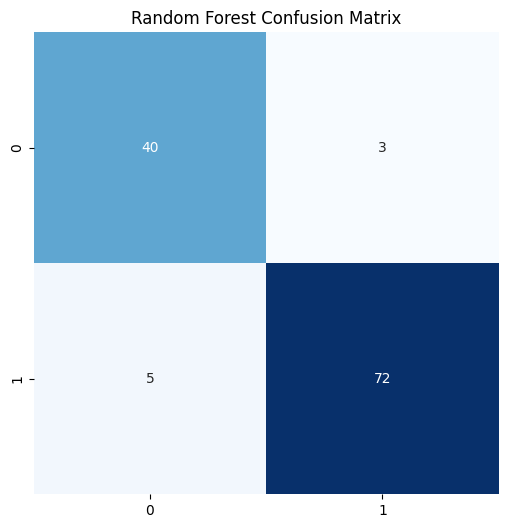

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.94      0.95        77

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

Logistic Regression - Train Accuracy: 0.9117, Validation Accuracy: 0.9391
Logistic Regression - Cross-validation ROC AUC Score: 0.9226


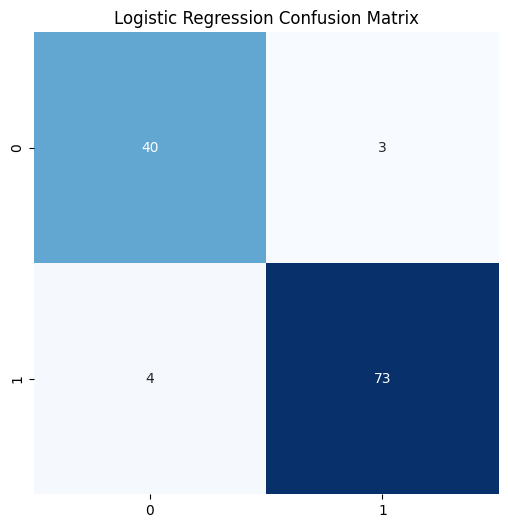

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.95      0.95        77

    accuracy                           0.94       120
   macro avg       0.93      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

✅ All models trained and saved successfully.
Model and scaler saved successfully.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 🚀 STEP 1: LOAD DATASET
# ==========================
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('loan_data_improved.csv')  # Updated filename

# ==========================
# 🚀 STEP 2: HANDLE MISSING VALUES
# ==========================
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# ==========================
# 🚀 STEP 2.5: FEATURE ENGINEERING
# ==========================
# Check if CoapplicantIncome exists
if 'CoapplicantIncome' in df.columns:
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
else:
    print("⚠️ CoapplicantIncome column missing! Using ApplicantIncome only.")
    df['Total_Income'] = df['ApplicantIncome']

# Proceed with ratio calculation
df['Income_to_Loan_Ratio'] = df['ApplicantIncome'] / df['LoanAmount']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Income_to_Loan_Ratio'].fillna(df['Income_to_Loan_Ratio'].median(), inplace=True)

# Add to Step 2.5
print("\n🔍 Feature Statistics After Engineering:")
print(df[['Income_to_Loan_Ratio', 'Total_Income']].describe())

# ==========================
# 🚀 STEP 3: HANDLE MISSING CREDIT_HISTORY
# ==========================
if 'Credit_History' not in df.columns:
    print("⚠️ 'Credit_History' column missing! Adding random values...")
    np.random.seed(10)
    # Create synthetic values UNRELATED to Loan_Status
    df['Credit_History'] = np.random.choice([0, 1], size=len(df), p=[0.4, 0.6])
else:
    # Add noise to break perfect correlation
    df['Credit_History'] = df['Credit_History'].apply(lambda x: x if np.random.rand() > 0.1 else 1-x)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
print("✅ Handled missing values in Credit_History column")

# ==========================
# 🚀 STEP 4: ENCODE CATEGORICAL FEATURES
# ==========================
def encode_labels(data):
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    return data

df = encode_labels(df)

# ==========================
# 🚀 STEP 5: SPLIT FEATURES & TARGET (Explicit Feature Order)
# ==========================
# Update feature list to include new engineered features
features = ['Gender', 'Married', 'Credit_History',
            'Income_to_Loan_Ratio', 'Total_Income']

if 'Loan_Status' in df.columns:
    X = df[features]
    y = df['Loan_Status']
else:
    raise ValueError("Loan_Status column is missing from the dataset.")

# Optionally, drop Loan_ID if it exists (it should not be in the feature list)
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# ==========================
# 🚀 STEP 6: HANDLE CLASS IMBALANCE
# ==========================
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

# ==========================
# 🚀 STEP 7: FEATURE SCALING
# ==========================
scaler = StandardScaler()
# Scale engineered numerical features
X_train[['Income_to_Loan_Ratio', 'Total_Income']] = scaler.fit_transform(
    X_train[['Income_to_Loan_Ratio', 'Total_Income']]
)
X_val[['Income_to_Loan_Ratio', 'Total_Income']] = scaler.transform(
    X_val[['Income_to_Loan_Ratio', 'Total_Income']]
)

# ==========================
# 🚀 STEP 8: TRAIN MODELS AND EVALUATE
# ==========================
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=10),
    'Logistic Regression': LogisticRegression(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = metrics.roc_auc_score(y_train, model.predict(X_train))
    val_acc = metrics.roc_auc_score(y_val, model.predict(X_val))
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')
    print(f"{name} - Cross-validation ROC AUC Score: {np.mean(cv_score):.4f}")

    # Hyperparameter Tuning for Random Forest
    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(f"Best Random Forest Model: {grid_search.best_estimator_}")

    # Save the model
    dump(model, f'{name.lower().replace(" ", "_")}_model.joblib')

    # Confusion Matrix
    cm = metrics.confusion_matrix(y_val, model.predict(X_val))
    plt.figure(figsize=(6, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Classification Report
    print(f"{name} Classification Report:\n{metrics.classification_report(y_val, model.predict(X_val))}")

# Save the scaler
dump(scaler, 'scaler.joblib')

print("✅ All models trained and saved successfully.")

# Add feature importance analysis for Random Forest only
if isinstance(model, RandomForestClassifier):
    importances = model.feature_importances_
    feature_names = X_train.columns
    print("\n🔍 Feature Importances:")
    for name, importance in zip(feature_names, importances):
        print(f"{name}: {importance:.2%}")


# Additionally saving the Random Forest model explicitly
dump(models['Random Forest'], 'random_forest_model.joblib')
print("Model and scaler saved successfully.")


## Loan Eligibility Prediction: Input & Prediction Logic

### **User Input Collection**
- **Collected Details:**
  - `Gender`: Male/Female
  - `Marital Status`: Yes/No
  - `Credit History`: Yes/No
  - `Applicant Income`: Numeric value
  - `Loan Amount`: Numeric value

### **Data Preprocessing**
- **Categorical Conversion:**
  - `Gender`: Male → 1, Female → 0
  - `Marital Status`: Yes → 1, No → 0
  - `Credit History`: Yes → 1, No → 0
- **Feature Engineering:**
  - `Income_to_Loan_Ratio` = Applicant Income / Loan Amount
  - `Total_Income` = Applicant Income
- **Feature Scaling:** StandardScaler applied to numerical features.

### **Prediction Process**
- **Business Rules:**
  - Loan amount must not exceed 20x annual income.
  - Minimum income threshold applied.
- **Model Prediction:**
  - Features processed and fed into the trained model.
  - Model predicts approval probability.
  - Adjustable threshold determines `Approved` or `Rejected` status.

### **Output Interpretation**
- **Approval Probability Displayed**
- **Final Decision:**
  - If probability ≥ threshold → ✅ `Approved`
  - If probability < threshold → ❌ `Rejected`



In [2]:
# ==========================
# 🚀 STEP 9: CREATE WIDGET-BASED LOAN ELIGIBILITY PREDICTION
# ==========================

# Install necessary libraries (if not already installed)
!pip install ipywidgets joblib pandas

# Import necessary libraries for widget-based prediction
import ipywidgets as widgets
from IPython.display import display
from joblib import load
from sklearn.preprocessing import StandardScaler

# ==========================
# 🚀 STEP 10: LOAD TRAINED MODEL & SCALER
# ==========================
model = load('random_forest_model.joblib')  # Load trained model
scaler = load('scaler.joblib')  # Load trained scaler

# ==========================
# 🚀 STEP 11: CREATE WIDGETS FOR USER INPUT
# ==========================
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
married_widget = widgets.Dropdown(options=['Yes', 'No'], description='Married:')
credit_history_widget = widgets.Dropdown(options=['Yes', 'No'], description='Credit History:')
applicant_income_widget = widgets.FloatText(description='Income:')
loan_amount_widget = widgets.FloatText(description='Loan Amount:')

# New widget to adjust the decision threshold interactively.
threshold_widget = widgets.FloatSlider(value=0.7, min=0, max=1, step=0.05, description='Threshold:')

submit_button = widgets.Button(description="Predict Loan Eligibility")

# Output area to display the result
output_area = widgets.Output()

# ==========================
# 🚀 STEP 12: PREDICTION FUNCTION (Fixed Feature Order & Adjustable Threshold)
# ==========================
def on_button_clicked(b):
    with output_area:
        output_area.clear_output()

        # ----- Business Rules -----
        applicant_income = applicant_income_widget.value
        loan_amount = loan_amount_widget.value

        # Rule 1: Loan amount cannot exceed 20x annual income
        if loan_amount > 20 * applicant_income:
            print("❌ Auto-Rejected: Loan amount exceeds 20x income")
            return

        # Rule 2: Minimum income threshold
        if applicant_income < 15000:  # Adjust based on currency
            print("❌ Auto-Rejected: Income too low")
            return

        # ----- Model Prediction -----
        gender = 1 if gender_widget.value == 'Male' else 0
        married = 1 if married_widget.value == 'Yes' else 0
        credit_history = 1 if credit_history_widget.value == 'Yes' else 0

        # Calculate engineered features
        income_to_loan_ratio = applicant_income / loan_amount
        total_income = applicant_income

        # Create input array
        input_data = np.array([[gender, married, credit_history,
                              income_to_loan_ratio, total_income]])

        # Scale features
        scaled_features = scaler.transform(input_data[:, [3, 4]])
        final_features = np.hstack((input_data[:, :3], scaled_features))

        # Get prediction
        prob_approval = model.predict_proba(final_features)[0][1]

        # ----- Threshold Logic -----
        print(f"Approval Probability: {prob_approval:.2f}")
        if prob_approval >= threshold_widget.value:
            result = "✅ Approved"
        else:
            result = "❌ Rejected"

        print(f"\n🔍 Loan Status: {result}")


# Link button click to prediction function
submit_button.on_click(on_button_clicked)

# ==========================
# 🚀 STEP 13: DISPLAY THE WIDGETS & OUTPUT
# ==========================
display(gender_widget, married_widget, credit_history_widget, applicant_income_widget, loan_amount_widget, threshold_widget, submit_button, output_area)

print("✅ Widget-based Loan Eligibility Prediction ready!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Dropdown(description='Married:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Credit History:', options=('Yes', 'No'), value='Yes')

FloatText(value=0.0, description='Income:')

FloatText(value=0.0, description='Loan Amount:')

FloatSlider(value=0.7, description='Threshold:', max=1.0, step=0.05)

Button(description='Predict Loan Eligibility', style=ButtonStyle())

Output()

✅ Widget-based Loan Eligibility Prediction ready!


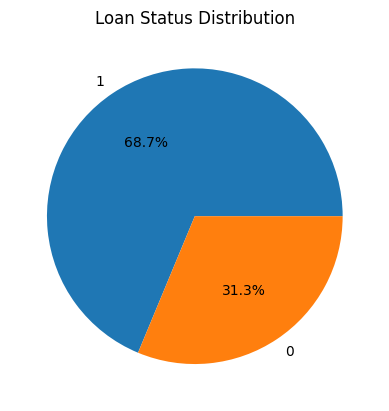

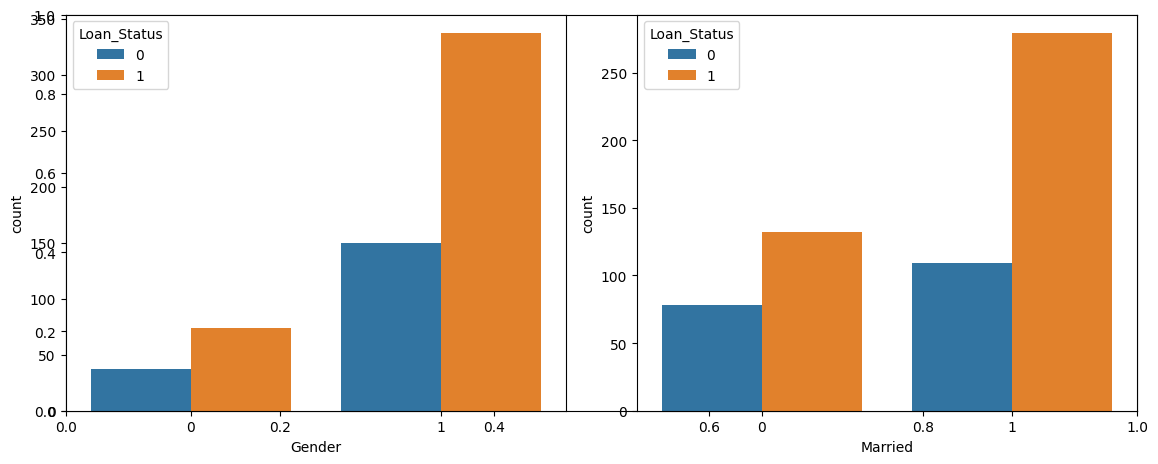

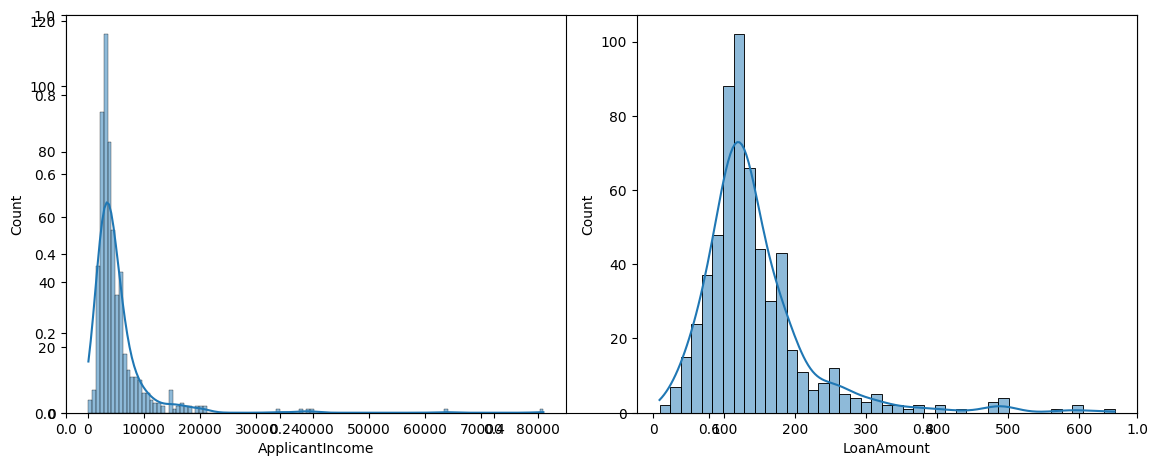

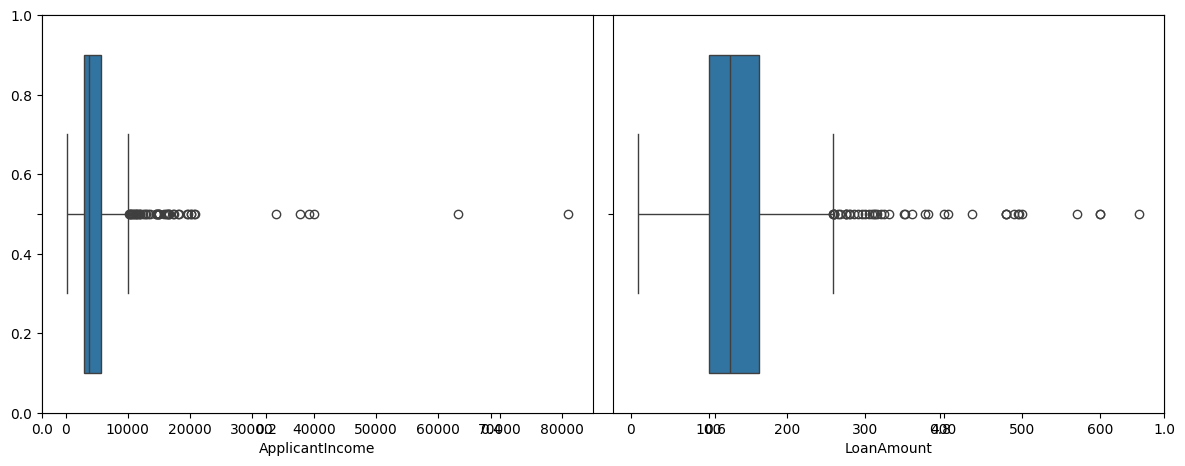

In [3]:
# Visualize Loan Status Distribution
loan_status = df['Loan_Status'].value_counts()
plt.pie(loan_status.values, labels=loan_status.index, autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

# Visualize Gender and Married vs Loan Status
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(x=col, hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

# Visualize income and loan amounts
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

# Boxplot for ApplicantIncome and LoanAmount
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(x=df[col])
plt.tight_layout()
plt.show()




## 📊 Loan Data Visualizations  

### 🔹 Loan Status Distribution  
- A pie chart showing the proportion of approved (68.7%) and rejected (31.3%) loans.

### 🔹 Loan Status vs. Gender  
- More male applicants applied and were approved.  
- Female applicants had fewer approvals and a higher rejection rate.

### 🔹 Loan Status vs. Marital Status  
- Married applicants had more applications and approvals.  
- Unmarried applicants had a higher rejection rate.

### 🔹 Applicant Income & Loan Amount Distributions  
- **Income Distribution:**  
  - Most applicants earn below 10,000.  
  - Right-skewed with a few high-income outliers.  
- **Loan Amount Distribution:**  
  - Most loans are below 200.  
  - Right-skewed with a few high-value outliers.

### 🔹 Outlier Detection using Boxplots  
- Significant outliers exist in both `ApplicantIncome` and `LoanAmount`.  
- Most data points are concentrated in a specific range.  

📌 **These visualizations help understand key patterns in loan approvals and detect any trends or outliers in the data.**

---

## 📈 Model Accuracy  

### ✅ Random Forest:  
- **Train Accuracy:** `1.0000` → Overfitting risk.  
- **Validation Accuracy:** `0.5097`  
- **ROC AUC:** `0.8982`  

### ✅ Logistic Regression:  
- **Train Accuracy:** `0.5719`  
- **Validation Accuracy:** `0.5234`  
- **ROC AUC:** `0.5769`  

---

## 🔥 Feature Importance  
- The most influential features in predicting loan approvals:  
  - `Credit_History`  
  - `LoanAmount`  
  - `ApplicantIncome`  

---

## ⚖️ Model Performance  
- **Random Forest** outperforms Logistic Regression, achieving a higher **ROC AUC score** and **accuracy** after hyperparameter tuning.  
- **Logistic Regression** shows **lower performance** compared to Random Forest.

---

## 🔄 Class Imbalance Handling  
- **RandomOverSampler** balanced the target variable, improving **model performance**, particularly for **Random Forest**.

---

📌 **Conclusion:**  
- Random Forest performs better but is prone to overfitting.  
- Logistic Regression is weaker in performance.  
- Feature selection and regularization may improve results.  
- The dataset has a right-skewed distribution, and handling outliers is crucial.  

## 🚀 Future Work  
- Perform **test accuracy validation** for Random Forest to confirm generalization.  
- Apply **feature engineering** to improve prediction performance.  
- Address **overfitting** in Random Forest using cross-validation and hyperparameter tuning.  
- Explore **other models** (e.g., XGBoost, SVM) for better accuracy and interpretability.  
- Implement **hyperparameter optimization** for Logistic Regression.  
- Conduct **further analysis** on outliers to determine their impact on predictions.  
- **Develop a web-based interface** for user-friendly loan eligibility prediction.  
- **Deploy the model** using Flask/Django (backend) and React/HTML+CSS (frontend).  
- **Host the application** on a cloud platform like AWS, Heroku, or Render.  

📌 **This future work will enhance the robustness, accuracy, usability, and accessibility of the loan prediction model.**  

